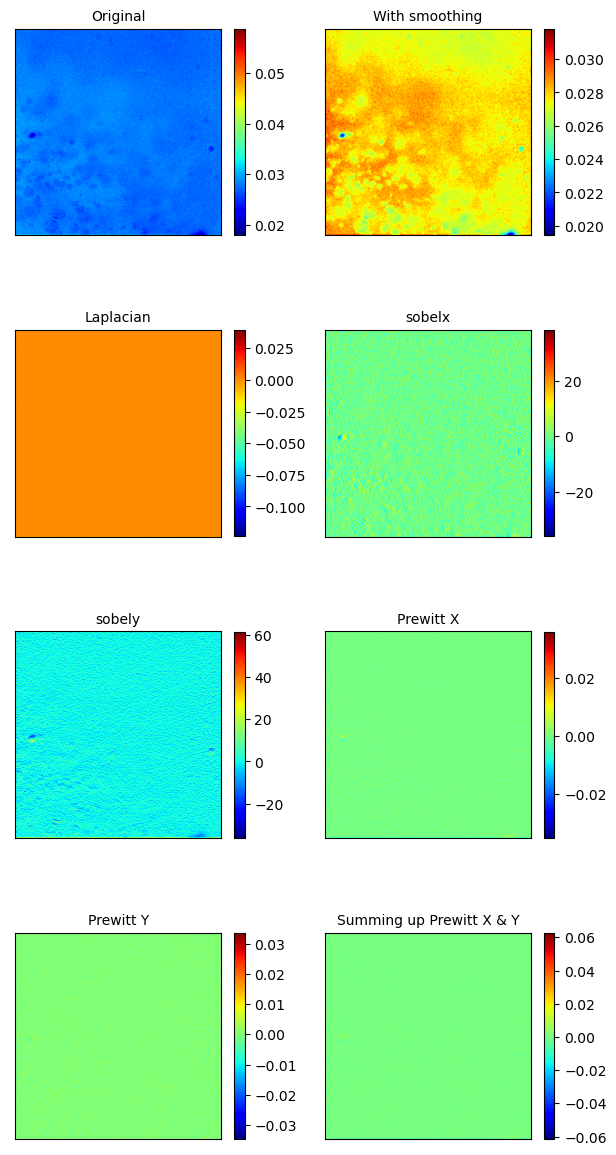

In [52]:
from PIL import Image
import numpy as np
import cv2
from matplotlib import pyplot as plt

arr=np.load("E:\\Rapid-FLIM_Polymer2\\PVC\\PVC_M01_RF070.npy") 
img=arr[0,:,:]

blur = cv2.GaussianBlur(img, (9,9), 0)

'''with smoothing
    average_blur
img = cv2.blur(img, (13, 13), 0)
    Gaussian_blur
img = cv2.GaussianBlur(img, (13, 13), 0)
    Median blur
img=cv2.medianBlur(img,ksize=)
'''
#canny=cv2.Canny(img,125,175)



scale=3
width=int(img.shape[0]*scale)
height=int(img.shape[1]*scale)
dim=(width,height)
img_resized=cv2.resize(img, dim, interpolation=cv2.INTER_LINEAR)

laplacian = cv2.Laplacian(img,cv2.CV_64F)

sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=9)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=9)

kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
img_prewittx = cv2.filter2D(img, -1, kernelx)
img_prewitty = cv2.filter2D(img, -1, kernely)
add =img_prewittx + img_prewitty

output = [img, blur , laplacian, sobelx, sobely, img_prewittx, img_prewitty, add]
titles = ['Original','With smoothing','Laplacian', 'sobelx', 'sobely','Prewitt X','Prewitt Y', 'Summing up Prewitt X & Y']
for i in range(8):
    fig = plt.figure(num=1, figsize=(7.33, 15))
    ax1 = fig.add_subplot(4, 2, i + 1)
    plt.imshow(output[i], cmap='jet')
    plt.title(titles[i],fontsize=10)
    plt.axis('on')
    plt.colorbar(shrink=0.82,pad=0.05)
    plt.xticks([])
    plt.yticks([])
plt.show()
# cv2.imshow('Canny Edges',canny)
# cv2.waitKey(0)
# cv2.destroyWindow('Canny Edges')